# НАША ЗАДАЧА

“В какой тип климатического оборудования стоит инвестировать больше, чтобы повысить удовлетворенность клиентов созданными условиями в зависимости от региона? И на что стоит обратить внимание при развитии бизнеса в разных регионах?”


# ИМПОРТЫ

In [178]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

# FILE

In [179]:
FILEPATH = "data.csv"

# DATA FRAME

# Базовая подготовка датасета к проведению рассчетов

In [180]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]

column_types = {
    'year': 'int',  # Год (целое число)
    'season': 'category',  # Время года (категориальная переменная: весна, лето и т.д.)
    'climate': 'category',  # Климат (категориальная переменная: названия типов климата)
    'city': 'category',  # Город (категориальная переменная)
    'country': 'category',  # Страна (категориальная переменная)
    'cooling_method': 'category',  # Способ охлаждения (категориальная переменная)
    'mixed_cooling_mode': 'category',  # Режим при смешанном типе охлаждения (категориальная переменная)
    'heating_method': 'category',  # Способ обогрева (категориальная переменная)
    'age': 'int',  # Возраст (целое число)
    'gender': 'category',  # Пол (категориальная переменная: мужской/женский)
    'temperature_feeling': 'float',  # Ощущение температуры (целое число от -3 до +3)
    'temperature_feeling_bool': 'bool',  # Ощущение температуры (bool)
    'preferred_temperature_change': 'category',  # Предпочтительное изменение температуры (категориальная переменная)
    'air_movement_feeling_bool': 'bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change': 'category',  # Предпочтительное изменение движения воздуха (категориальная переменная)
    'comfort_rating': 'int',  # Оценка комфорта (целое число от 1 до 6)
    'clothing_insulation': 'float',  # Утепление (вещественное число, связанный с одеждой фактор)
    'indoor_air_temperature': 'float',  # Температура воздуха в помещении (вещественное число)
    'outdoor_air_temperature': 'float',  # Температура воздуха на улице (вещественное число)
    'relative_humidity': 'float',  # Относительная влажность (вещественное число)
    'air_speed': 'float',  # Скорость воздуха (вещественное число)
    # 'height': 'float',  # Рост (вещественное число)
    # 'weight': 'float',  # Вес (вещественное число)
    'curtains': 'bool',  # Занавески (категориальная переменная: 0 или 1)
    'fan_mode': 'bool',  # Вентилятор (категориальная переменная: 0 или 1)
    'window_status': 'bool',  # Окно (категориальная переменная: 0 или 1)
    'door_status': 'bool',  # Двери (категориальная переменная: 0 или 1)
    'heating_mode': 'bool',  # Отопление (категориальная переменная: 0 или 1)
    'average_monthly_outdoor_temperature': 'float',  # Среднемесячная температура на улице (вещественное число)
    'number_of_complaints': 'int'  # Количество рекламаций (целое число)
}

In [181]:
df = pd.read_csv(
    'data.csv',
    sep=';',
    decimal='.',
    header=0,
    names=column_names
)

# Описание нашего DF

ВСЕ ДАННЫЕ О DF

In [182]:
df.dtypes

year                                   float64
season                                  object
climate                                 object
city                                    object
country                                 object
cooling_method                          object
mixed_cooling_mode                      object
heating_method                          object
age                                    float64
gender                                  object
temperature_feeling                    float64
temperature_feeling_bool               float64
preferred_temperature_change            object
air_movement_feeling_bool              float64
preferred_air_movement_change           object
comfort_rating                         float64
clothing_insulation                    float64
indoor_air_temperature                 float64
outdoor_air_temperature                float64
relative_humidity                      float64
air_speed                              float64
height       

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 484 non-null    float64
 1   season                               484 non-null    object 
 2   climate                              484 non-null    object 
 3   city                                 484 non-null    object 
 4   country                              484 non-null    object 
 5   cooling_method                       484 non-null    object 
 6   mixed_cooling_mode                   337 non-null    object 
 7   heating_method                       222 non-null    object 
 8   age                                  413 non-null    float64
 9   gender                               412 non-null    object 
 10  temperature_feeling                  484 non-null    float64
 11  temperature_feeling_bool        

Проходимся по всем функциям, чтобы узнать подробную информацию о нашем датасете

In [184]:
df.dtypes

year                                   float64
season                                  object
climate                                 object
city                                    object
country                                 object
cooling_method                          object
mixed_cooling_mode                      object
heating_method                          object
age                                    float64
gender                                  object
temperature_feeling                    float64
temperature_feeling_bool               float64
preferred_temperature_change            object
air_movement_feeling_bool              float64
preferred_air_movement_change           object
comfort_rating                         float64
clothing_insulation                    float64
indoor_air_temperature                 float64
outdoor_air_temperature                float64
relative_humidity                      float64
air_speed                              float64
height       

In [185]:
df.describe()

,year,age,temperature_feeling,temperature_feeling_bool,air_movement_feeling_bool,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
count,484.000000,413.000000,484.000000,484.000000,198.000000,215.000000,484.000000,484.000000,72.000000,484.000000,484.000000,143.000000,214.000000,72.000000,146.000000,279.000000,157.000000,79.00000,484.000000,484.000000
mean,2011.033058,40.634383,0.203306,0.789256,0.752525,4.772093,0.634587,26.072107,24.104167,52.973760,0.760558,164.411678,65.471963,0.513889,0.527397,0.247312,0.184713,0.78481,27.389669,0.105372
std,0.922988,11.001301,1.091976,0.408259,0.432639,1.261161,0.253103,7.681363,0.604546,13.036204,4.921106,21.273235,11.574079,0.503315,0.500967,0.432225,0.389307,0.41358,19.469562,0.440276
min,2010.000000,22.000000,-3.000000,0.000000,0.000000,1.000000,0.360000,16.200000,22.800000,23.800000,0.000000,5.230000,42.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.500000,0.000000
25%,2010.000000,35.000000,0.000000,1.000000,1.000000,4.000000,0.460000,23.800000,23.800000,42.775000,0.060000,160.000000,57.000000,0.000000,0.000000,0.000000,0.000000,1.00000,22.000000,0.000000
50%,2011.000000,42.000000,0.000000,1.000000,1.000000,5.000000,0.590000,24.600000,24.100000,53.750000,0.100000,165.100000,65.000000,1.000000,1.000000,0.000000,0.000000,1.00000,22.000000,0.000000
75%,2012.000000,45.000000,1.000000,1.000000,1.000000,6.000000,0.700000,25.900000,24.400000,62.325000,0.140000,172.700000,72.750000,1.000000,1.000000,0.000000,0.000000,1.00000,30.800000,0.000000
max,2012.000000,65.000000,3.000000,1.000000,1.000000,6.000000,2.080000,77.000000,25.900000,85.100000,63.830000,190.500000,110.000000,1.000000,1.000000,1.000000,1.000000,1.00000,328.000000,3.000000


Размеры нашего DF

In [186]:
df.shape

(484, 30)

Колонки нашего Data Frame

In [187]:
df.columns

Index(['year', 'season', 'climate', 'city', 'country', 'cooling_method',
       'mixed_cooling_mode', 'heating_method', 'age', 'gender',
       'temperature_feeling', 'temperature_feeling_bool',
       'preferred_temperature_change', 'air_movement_feeling_bool',
       'preferred_air_movement_change', 'comfort_rating',
       'clothing_insulation', 'indoor_air_temperature',
       'outdoor_air_temperature', 'relative_humidity', 'air_speed', 'height',
       'weight', 'curtains', 'fan_mode', 'window_status', 'door_status',
       'heating_mode', 'average_monthly_outdoor_temperature',
       'number_of_complaints'],
      dtype='object')

Смотрим, какие попуски есть

In [188]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                     147
heating_method                         262
age                                     71
gender                                  72
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              286
preferred_air_movement_change            0
comfort_rating                         269
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                412
relative_humidity                        0
air_speed                                0
height                                 341
weight                         

# Исследование данных на качество и предобработка




Исследование данных на качество и предобработка
Для проведения исследования необходимо:
- Названия столбцов привести в соответствии с PEP8
- Исследовать типы данных, привести данные к правильному типу, где это необходимо
- Проверить данные на пропуски и заполнить их при необходимости. Обосновать решение.
- Проверить данные на явные и неявные (в категориальных столбцах) дубликаты. Обработать дубликаты.
- Провести аналитический и графический анализ данных. Сделать выводы.
- Проверить данные на выбросы и адекватность данных. Предположить причину возникновения выбросов и обработать такие значения.





## Названия столбцов привести в соответствии с PEP8

In [189]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

Провека, что все прошло успешно

In [190]:
df.columns

Index(['year', 'season', 'climate', 'city', 'country', 'cooling_method',
       'mixed_cooling_mode', 'heating_method', 'age', 'gender',
       'temperature_feeling', 'temperature_feeling_bool',
       'preferred_temperature_change', 'air_movement_feeling_bool',
       'preferred_air_movement_change', 'comfort_rating',
       'clothing_insulation', 'indoor_air_temperature',
       'outdoor_air_temperature', 'relative_humidity', 'air_speed', 'height',
       'weight', 'curtains', 'fan_mode', 'window_status', 'door_status',
       'heating_mode', 'average_monthly_outdoor_temperature',
       'number_of_complaints'],
      dtype='object')

In [191]:
df

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,...,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,...,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,...,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,...,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,...,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,...,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,35.0,Мужской,...,0.32,172.7,50.0,NaN,1.0,1.0,NaN,0.0,30.9,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,NaN,NaN,Мужской,...,0.16,NaN,65.0,NaN,NaN,0.0,0.0,NaN,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0


## Исследовать типы данных, привести данные к правильному типу, где это необходимо

Изменение колонок в categorical_cols для дальнейшего удобства работы с ними

In [192]:
categorical_cols = [
    'season', 'climate', 'city', 'country', 'cooling_method',
    'mixed_cooling_mode', 'heating_method', 'gender',
    'preferred_temperature_change', 'preferred_air_movement_change'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

Также проходимся по остальным значениям и приводим их к нужному типу данных

In [193]:
bool_cols = [
    'temperature_feeling_bool', 'air_movement_feeling_bool',
    'curtains', 'fan_mode', 'window_status', 'door_status', 'heating_mode'
]

for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].astype('bool')

In [194]:
numeric_cols = [
    'year', 'age', 'temperature_feeling', 'comfort_rating',
    'clothing_insulation', 'indoor_air_temperature', 'outdoor_air_temperature',
    'relative_humidity', 'air_speed', 'height', 'weight',
    'average_monthly_outdoor_temperature', 'number_of_complaints'
]


int_cols = ['year', 'age', 'clothing_insulation', 'number_of_complaints', 'height', 'weight', 'comfort_rating']


float_cols = [col for col in numeric_cols if col not in int_cols]

for col in numeric_cols:
    if col in df.columns:
        if col in int_cols:
            # First round, then convert to Int64 (nullable integer)
            df[col] = pd.to_numeric(df[col], errors='coerce').round(0).astype('Int64')
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)


Проверка, что все прошло успешно

In [195]:
df.dtypes

year                                      Int64
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       Int64
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool                   bool
preferred_temperature_change           category
air_movement_feeling_bool                  bool
preferred_air_movement_change          category
comfort_rating                            Int64
clothing_insulation                       Int64
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       float64
air_speed                               

## Проверить данные на выбросы и адекватность данных. Предположить причину возникновения выбросов и обработать такие значения.


### Колонка "Climate"

Проверяем, что лежит в этой колонке

In [196]:
df["climate"].unique()

['Cубтропический океанический', 'Cубтроп океанич', 'Субтропическое высокогорье', 'Жаркий полузасушливый', 'Тропическая влажная саванна', 'Влажный субтропический муссонный']
Categories (6, object): ['Cубтроп океанич', 'Cубтропический океанический', 'Влажный субтропический муссонный', 'Жаркий полузасушливый', 'Субтропическое высокогорье', 'Тропическая влажная саванна']

Увидели ошибку в написании-исправляем

In [197]:
df["climate"] = df["climate"].replace({
    "Cубтроп океанич" : 'Cубтропический океанический'
})

In [198]:
df["climate"].unique()

['Cубтропический океанический', 'Субтропическое высокогорье', 'Жаркий полузасушливый', 'Тропическая влажная саванна', 'Влажный субтропический муссонный']
Categories (5, object): ['Cубтропический океанический', 'Влажный субтропический муссонный', 'Жаркий полузасушливый', 'Субтропическое высокогорье', 'Тропическая влажная саванна']

### Колонка "температура_воздуха_в_помещении"

Q1 (25th percentile): 23.8
Q3 (75th percentile): 25.9
IQR: 2.099999999999998
Lower outlier boundary: 20.650000000000006
Upper outlier boundary: 29.049999999999997

Number of outliers: 58

Sample outliers:
    indoor_air_temperature
1                     74.8
7                     74.8
9                     76.4
23                    77.0
33                    74.9
38                    75.5
41                    75.7
45                    74.0
54                    75.7
67                    74.9


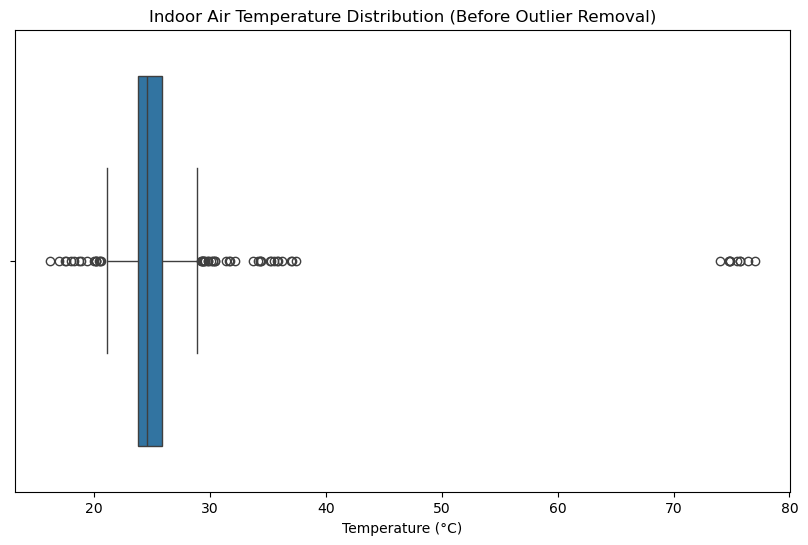


Original dataset size: 484
Size after outlier removal: 426
Records removed: 58


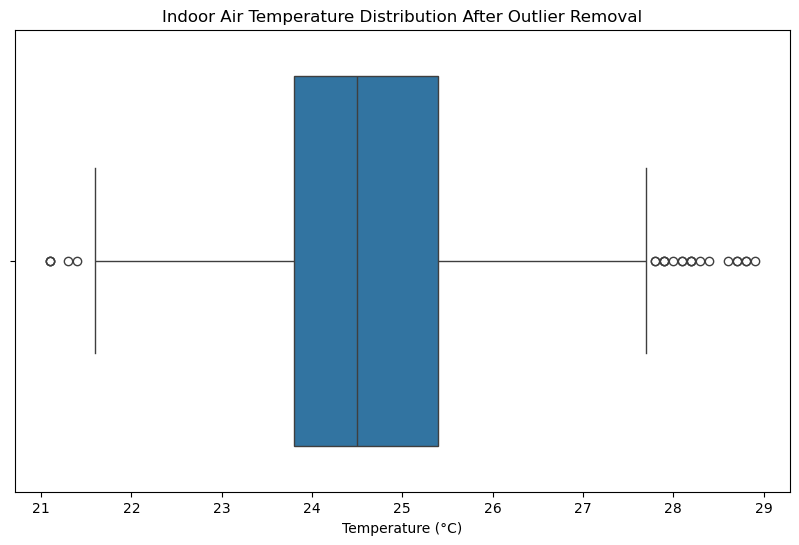

In [199]:

column = 'indoor_air_temperature'


Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Отображаем статистику
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower outlier boundary: {lower_bound}")
print(f"Upper outlier boundary: {upper_bound}")

# Визуализация выбросов
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")
print("\nSample outliers:")
print(outliers[[column]].head(10))

#  Визуалицзация
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[column])
plt.title('Indoor Air Temperature Distribution (Before Outlier Removal)')
plt.xlabel('Temperature (°C)')
plt.show()

# Убираем выбросы
df_no_outliers_Indoor_Air_Temperature = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

# Стистика
print(f"\nOriginal dataset size: {len(df)}")
print(f"Size after outlier removal: {len(df_no_outliers_Indoor_Air_Temperature)}")
print(f"Records removed: {len(df) - len(df_no_outliers_Indoor_Air_Temperature)}")

#  Визуализация после
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers_Indoor_Air_Temperature[column])
plt.title('Indoor Air Temperature Distribution After Outlier Removal')
plt.xlabel('Temperature (°C)')
plt.show()

### Колонка "среднемесячная_температура_на_улице"

Предположим,что данные значения были из-за ошибки при вводе. Меняем их

In [200]:
# Заменяем явные ошибки
df['average_monthly_outdoor_temperature'] = df['average_monthly_outdoor_temperature'].replace(
    {328.0: 32.8, 220.0: 22.0}
)


Статистика для столбца average_monthly_outdoor_temperature:
Q1 (25-й перцентиль): 22.00°C
Q3 (75-й перцентиль): 30.40°C
IQR (межквартильный размах): 8.40°C
Нижняя граница выбросов: 9.40°C
Верхняя граница выбросов: 43.00°C

Обнаружено выбросов: 14

Примеры выбросов:
    average_monthly_outdoor_temperature
11                                328.0
14                                 84.0
20                                 91.0
28                                 91.0
30                                 91.0
34                                 89.0
39                                 89.0
44                                 84.0
68                                 91.0
81                                220.0


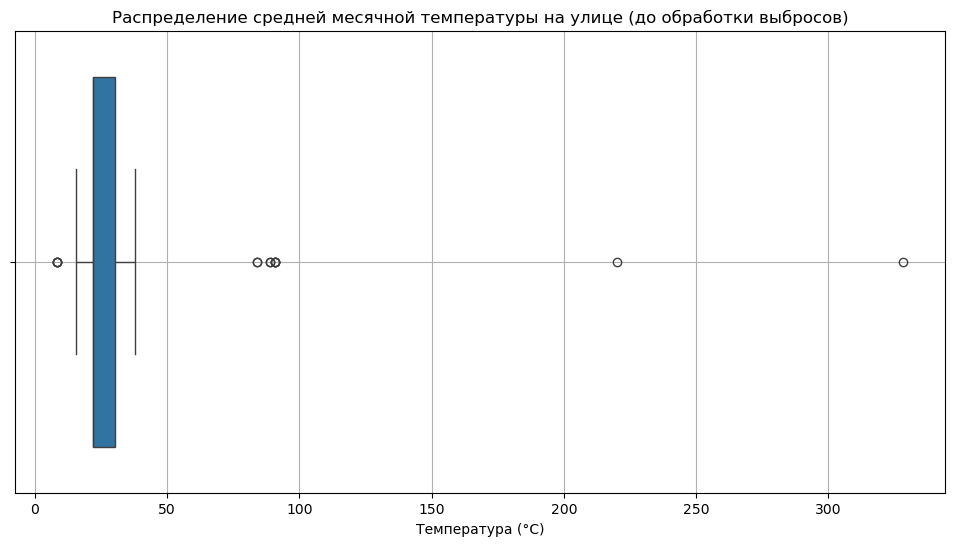


Сравнение размеров данных:
Исходный размер: 426 записей
После удаления выбросов: 412 записей
Удалено записей: 14


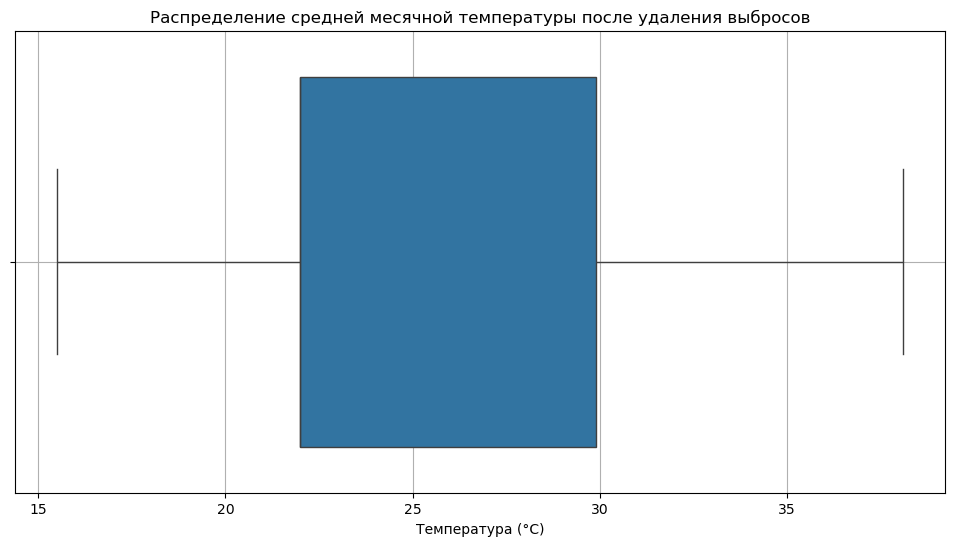

In [201]:
# аналогично с прошлым столбцом делаем анализ
column = 'average_monthly_outdoor_temperature'


Q1 = df_no_outliers_Indoor_Air_Temperature[column].quantile(0.25)  
Q3 = df_no_outliers_Indoor_Air_Temperature[column].quantile(0.75)  
IQR = Q3 - Q1  


lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  


print(f"Статистика для столбца {column}:")
print(f"Q1 (25-й перцентиль): {Q1:.2f}°C")
print(f"Q3 (75-й перцентиль): {Q3:.2f}°C")
print(f"IQR (межквартильный размах): {IQR:.2f}°C")
print(f"Нижняя граница выбросов: {lower_bound:.2f}°C") 
print(f"Верхняя граница выбросов: {upper_bound:.2f}°C")


outliers = df_no_outliers_Indoor_Air_Temperature[
    (df_no_outliers_Indoor_Air_Temperature[column] < lower_bound) | 
    (df_no_outliers_Indoor_Air_Temperature[column] > upper_bound)
]

print(f"\nОбнаружено выбросов: {len(outliers)}")
print("\nПримеры выбросов:")
print(outliers[[column]].head(10))

#  Визуализация распределения до обработки
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_no_outliers_Indoor_Air_Temperature[column])
plt.title('Распределение средней месячной температуры на улице (до обработки выбросов)')
plt.xlabel('Температура (°C)')
plt.grid(True)
plt.show()

#  Создаем новый датафрейм без выбросов
df_no_outliers = df_no_outliers_Indoor_Air_Temperature[
    (df_no_outliers_Indoor_Air_Temperature[column] >= lower_bound) & 
    (df_no_outliers_Indoor_Air_Temperature[column] <= upper_bound)
].copy()

# Выводим сравнение размеров данных
print(f"\nСравнение размеров данных:")
print(f"Исходный размер: {len(df_no_outliers_Indoor_Air_Temperature)} записей")
print(f"После удаления выбросов: {len(df_no_outliers)} записей")
print(f"Удалено записей: {len(df_no_outliers_Indoor_Air_Temperature) - len(df_no_outliers)}")

#  Визуализация после обработки
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_no_outliers[column])
plt.title('Распределение средней месячной температуры после удаления выбросов')
plt.xlabel('Температура (°C)')
plt.grid(True)
plt.show()

Данные стали более однородными, что улучшит анализ. Убрали выбросы, чтобы ананализ стал четче.

### Колонка "скорость_воздуха"

АНАЛИЗ СКОРОСТИ ВОЗДУХА
Минимальное значение: 0.00 м/с
Максимальное значение: 63.83 м/с
Среднее значение: 0.74 м/с
Q1 (25-й перцентиль): 0.07 м/с
Q3 (75-й перцентиль): 0.13 м/с
IQR: 0.06 м/с
Верхняя граница выбросов: 0.22 м/с

Количество выбросов: 37
Процент выбросов: 9.0%

Примеры выбросов:
     air_speed
4        63.83
26       46.00
31       29.61
3        27.16
53       26.49
59       22.68
10       18.65
65       14.85
70        8.20
291       1.42


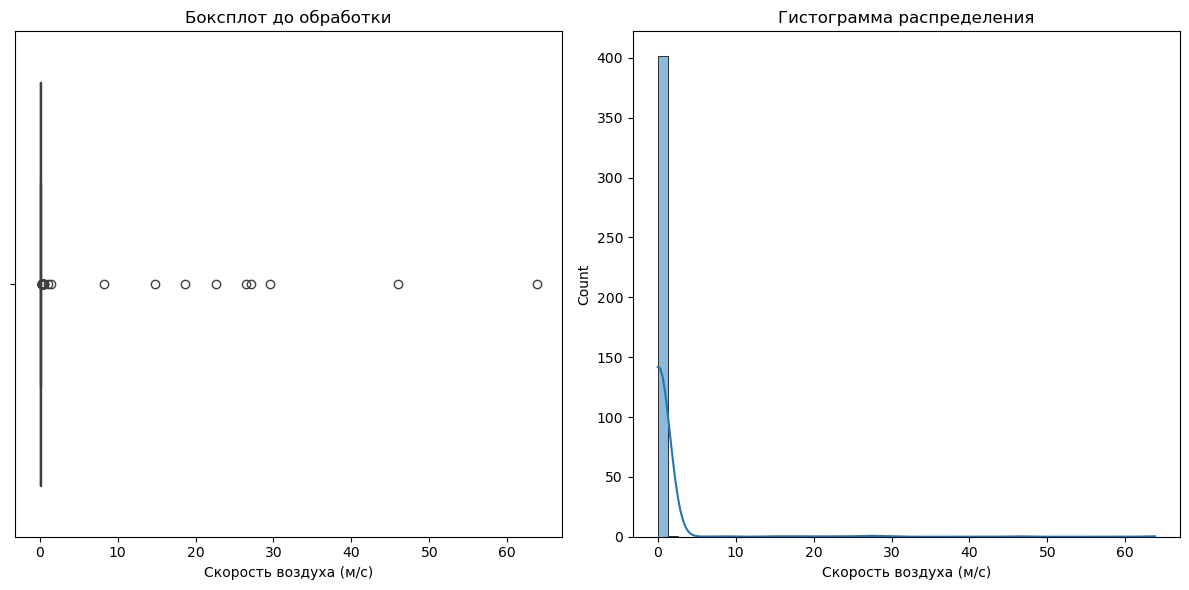


РЕЗУЛЬТАТЫ ОЧИСТКИ
Исходный размер данных: 412
После удаления отрицательных значений: 412
После удаления выбросов: 375
Всего удалено записей: 37
Новый диапазон: 0.00 - 0.22 м/с


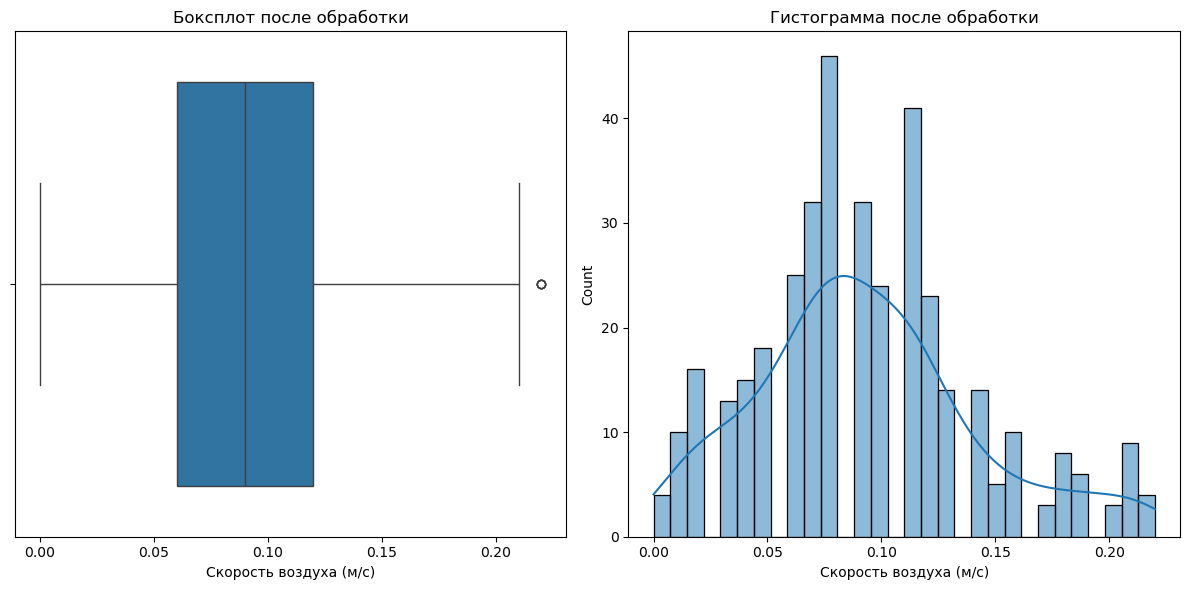

In [202]:
#аналогично с прошлыми колокнами делаем анализ
df_air_speed_cleaned = df_no_outliers.copy()

#Удаляем отрицательные значения скорости воздуха (физически невозможные)
df_air_speed_cleaned = df_air_speed_cleaned[df_air_speed_cleaned['air_speed'] >= 0]


column = 'air_speed'


Q1 = df_air_speed_cleaned[column].quantile(0.25)
Q3 = df_air_speed_cleaned[column].quantile(0.75)
IQR = Q3 - Q1


lower_bound = 0
upper_bound = Q3 + 1.5 * IQR


print("="*50)
print("АНАЛИЗ СКОРОСТИ ВОЗДУХА")
print("="*50)
print(f"Минимальное значение: {df_air_speed_cleaned[column].min():.2f} м/с")
print(f"Максимальное значение: {df_air_speed_cleaned[column].max():.2f} м/с")
print(f"Среднее значение: {df_air_speed_cleaned[column].mean():.2f} м/с")
print(f"Q1 (25-й перцентиль): {Q1:.2f} м/с")
print(f"Q3 (75-й перцентиль): {Q3:.2f} м/с")
print(f"IQR: {IQR:.2f} м/с")
print(f"Верхняя граница выбросов: {upper_bound:.2f} м/с")


outliers = df_air_speed_cleaned[(df_air_speed_cleaned[column] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")
print(f"Процент выбросов: {len(outliers)/len(df_air_speed_cleaned)*100:.1f}%")
print("\nПримеры выбросов:")
print(outliers[[column]].sort_values(by=column, ascending=False).head(10))

# Визуализация распределения (до обработки)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_air_speed_cleaned[column])
plt.title('Боксплот до обработки')
plt.xlabel('Скорость воздуха (м/с)')

plt.subplot(1, 2, 2)
sns.histplot(df_air_speed_cleaned[column], bins=50, kde=True)
plt.title('Гистограмма распределения')
plt.xlabel('Скорость воздуха (м/с)')
plt.tight_layout()
plt.show()

#Создаем новый очищенный DataFrame
df_air_speed_final = df_air_speed_cleaned[df_air_speed_cleaned[column] <= upper_bound]

# Проверка
print("\n" + "="*50)
print("РЕЗУЛЬТАТЫ ОЧИСТКИ")
print("="*50)
print(f"Исходный размер данных: {len(df_no_outliers)}")
print(f"После удаления отрицательных значений: {len(df_air_speed_cleaned)}")
print(f"После удаления выбросов: {len(df_air_speed_final)}")
print(f"Всего удалено записей: {len(df_no_outliers) - len(df_air_speed_final)}")
print(f"Новый диапазон: {df_air_speed_final[column].min():.2f} - {df_air_speed_final[column].max():.2f} м/с")

#Визуализация после обработки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_air_speed_final[column])
plt.title('Боксплот после обработки')
plt.xlabel('Скорость воздуха (м/с)')


plt.subplot(1, 2, 2)
sns.histplot(df_air_speed_final[column], bins=30, kde=True)
plt.title('Гистограмма после обработки')
plt.xlabel('Скорость воздуха (м/с)')
plt.tight_layout()
plt.show()

### Колонка "год"

Анализ выбросов для года:
25-й перцентиль (Q1): 2010
75-й перцентиль (Q3): 2012
Межквартильный размах (IQR): 2
Нижняя граница выбросов: 2007
Верхняя граница выбросов: 2015


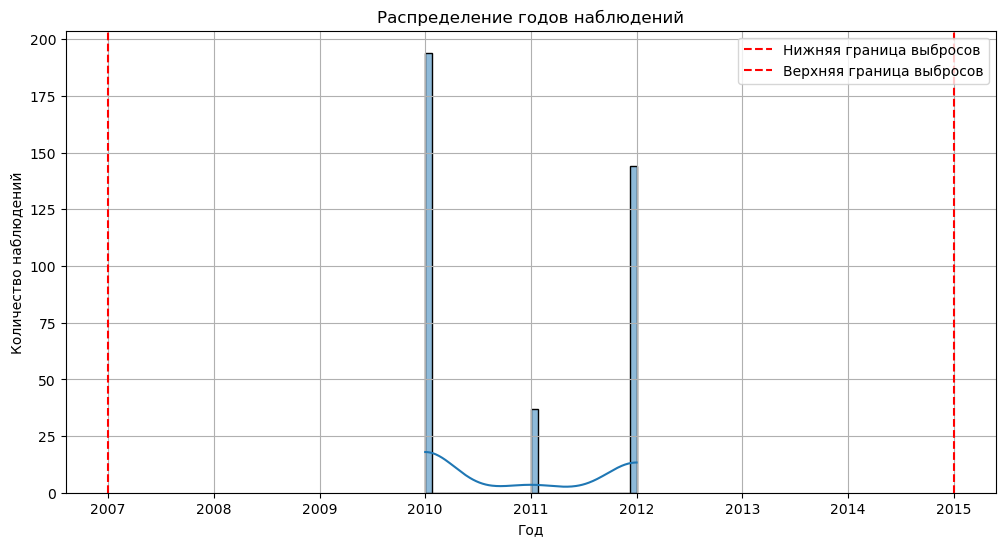


Найдено выбросов: 0
Примеры выбросов:
Series([], Name: count, dtype: Int64)

Размеры данных:
Исходный: 375 записей
Очищенный: 375 записей
Удалено: 0 записей (0.0%)


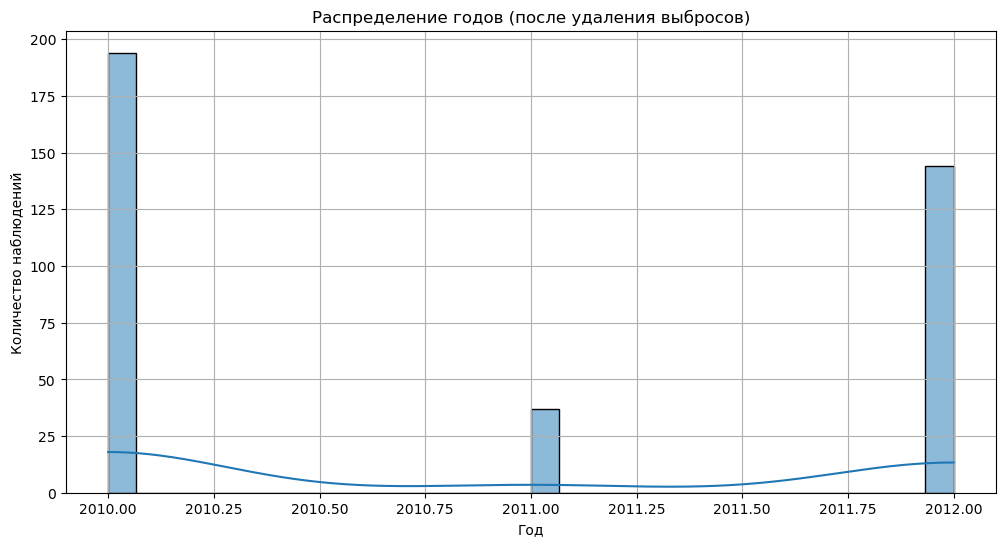

In [203]:
#аналогично с прошлыми колокнами делаем анализ
column = 'year'


Q1 = df_air_speed_final[column].quantile(0.25)
Q3 = df_air_speed_final[column].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print(f"Анализ выбросов для года:\n{'='*30}")
print(f"25-й перцентиль (Q1): {Q1:.0f}")
print(f"75-й перцентиль (Q3): {Q3:.0f}")
print(f"Межквартильный размах (IQR): {IQR:.0f}")
print(f"Нижняя граница выбросов: {lower_bound:.0f}")
print(f"Верхняя граница выбросов: {upper_bound:.0f}")

#  Визуализация - гистограмма распределения
plt.figure(figsize=(12, 6))
sns.histplot(data=df_air_speed_final, x=column, bins=30, kde=True)
plt.axvline(lower_bound, color='r', linestyle='--', label='Нижняя граница выбросов')
plt.axvline(upper_bound, color='r', linestyle='--', label='Верхняя граница выбросов')
plt.title('Распределение годов наблюдений')
plt.xlabel('Год')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.grid(True)
plt.show()

#  Выявление выбросов
outliers = df_air_speed_final[(df_air_speed_final[column] < lower_bound) | 
                             (df_air_speed_final[column] > upper_bound)]

print(f"\nНайдено выбросов: {len(outliers)}")
print("Примеры выбросов:")
print(outliers[column].value_counts().sort_index())

#  Фильтрация данных (без выбросов)
df_clean = df_air_speed_final[(df_air_speed_final[column] >= lower_bound) & 
                             (df_air_speed_final[column] <= upper_bound)].copy()

#  Сравнение размеров
print(f"\nРазмеры данных:")
print(f"Исходный: {len(df_air_speed_final)} записей")
print(f"Очищенный: {len(df_clean)} записей")
print(f"Удалено: {len(df_air_speed_final) - len(df_clean)} записей ({(len(df_air_speed_final) - len(df_clean))/len(df_air_speed_final)*100:.1f}%)")

#  Визуализация очищенных данных
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x=column, bins=30, kde=True)
plt.title('Распределение годов (после удаления выбросов)')
plt.xlabel('Год')
plt.ylabel('Количество наблюдений')
plt.grid(True)
plt.show()

### Колонка "вес"

Анализ выбросов для столбца 'weight':
Кол-во непустых значений: 144
Q1 (25-й перцентиль): 58.00
Q3 (75-й перцентиль): 75.00
IQR (межквартильный размах): 17.00
Границы нормальных значений: [32.50, 100.50]


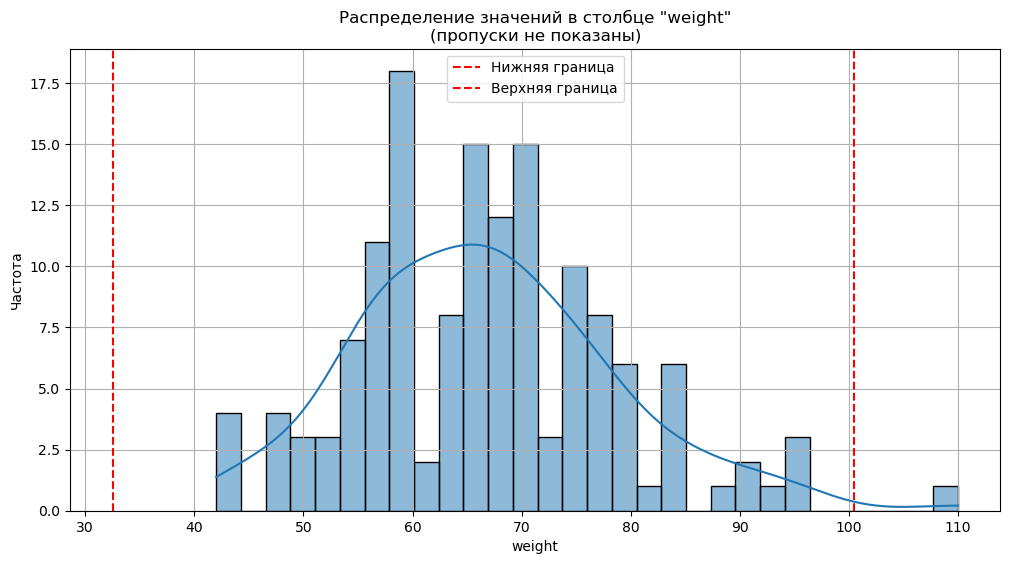


Обнаружено выбросов: 1 (0.7% от непустых значений)
Статистика по выбросам:
count      1.0
mean     110.0
std       <NA>
min      110.0
25%      110.0
50%      110.0
75%      110.0
max      110.0
Name: weight, dtype: Float64

Итоговая статистика:
Исходный размер данных: 375 строк
После фильтрации выбросов: 374 строк
Удалено строк с выбросами: 1
Пропусков в исходных данных: 231 (остались без изменений)


In [204]:
#аналогично с прошлыми колокнами делаем анализ
column = 'weight'

#  Выделяем непустые значения для анализа
non_null_data = df_clean[column].dropna()


Q1 = non_null_data.quantile(0.25)
Q3 = non_null_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print(f"Анализ выбросов для столбца '{column}':\n{'='*50}")
print(f"Кол-во непустых значений: {len(non_null_data)}")
print(f"Q1 (25-й перцентиль): {Q1:.2f}")
print(f"Q3 (75-й перцентиль): {Q3:.2f}")
print(f"IQR (межквартильный размах): {IQR:.2f}")
print(f"Границы нормальных значений: [{lower_bound:.2f}, {upper_bound:.2f}]")


plt.figure(figsize=(12, 6))
sns.histplot(non_null_data, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound, color='red', linestyle='--', label='Верхняя граница')
plt.title(f'Распределение значений в столбце "{column}"\n(пропуски не показаны)')
plt.xlabel(column)
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()


outliers = non_null_data[(non_null_data < lower_bound) | (non_null_data > upper_bound)]
print(f"\nОбнаружено выбросов: {len(outliers)} ({len(outliers)/len(non_null_data)*100:.1f}% от непустых значений)")
print("Статистика по выбросам:")
print(outliers.describe())

# Фильтр для выборки без выбросов (опционально, если нужно создать отдельный датафрейм)
normal_values_mask = (df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)
df_normal_weight = df_clean[normal_values_mask | df_clean[column].isna()]  # включаем все пропуски

print(f"\nИтоговая статистика:")
print(f"Исходный размер данных: {len(df_clean)} строк")
print(f"После фильтрации выбросов: {len(df_normal_weight)} строк")
print(f"Удалено строк с выбросами: {len(df_clean) - len(df_normal_weight)}")
print(f"Пропусков в исходных данных: {df_clean[column].isna().sum()} (остались без изменений)")

### Колонка relative_humidity

In [205]:
df_clean["relative_humidity"].unique()

array([34.7, 34.8, 42.2, 38.4, 31.7, 35.3, 43.6, 43.5, 34.4, 34.5, 38.7,
       39.4, 40.8, 34.2, 34.9, 36.9, 37.6, 38. , 39.1, 38.3, 45.9, 36. ,
       37.9, 30.8, 39.5, 37.4, 43.2, 41. , 38.1, 56.1, 74. , 60.7, 56.8,
       64.1, 58. , 76.6, 62.5, 64.4, 75.8, 66.8, 67.4, 73.1, 55. , 52.5,
       47.8, 60.3, 47.5, 60.1, 71.5, 62.6, 74.8, 61.5, 63.2, 58.5, 58.6,
       60. , 68.7, 58.3, 51.6, 53.3, 62.2, 60.2, 59. , 62.8, 59.5, 70.1,
       68.4, 69.4, 64. , 65.6, 68.5, 57.1, 54.5, 68.3, 72.1, 63.9, 49.3,
       56.6, 35.7, 57.6, 53.1, 62.3, 74.1, 68.6, 54.3, 71.8, 62.4, 58.2,
       56.3, 69.7, 71.1, 61.4, 59.2, 60.6, 59.3, 72.7, 50.9, 54.6, 71.7,
       55.5, 50.4, 65.4, 58.1, 55.6, 69.8, 53.7, 49.4, 59.6, 53.6, 54.8,
       75.7, 60.4, 73.5, 70.7, 61.9, 54.2, 56.2, 70.2, 48.9, 66.3, 53.8,
       67.2, 60.5, 54.4, 51.7, 49.9, 49.5, 67.7, 76. , 61.8, 56. , 63.6,
       56.5, 65.5, 59.9, 57.3, 73.6, 39.2, 66.9, 62.7, 28.3, 32.1, 74.2,
       58.7, 67.5, 72.2, 72.9, 64.5, 53.9, 57.4, 53

Анализ выбросов для столбца 'relative_humidity':
Кол-во непустых значений: 375
Q1 (25-й перцентиль): 45.95
Q3 (75-й перцентиль): 62.90
IQR (межквартильный размах): 16.95
Границы нормальных значений: [20.53, 88.32]


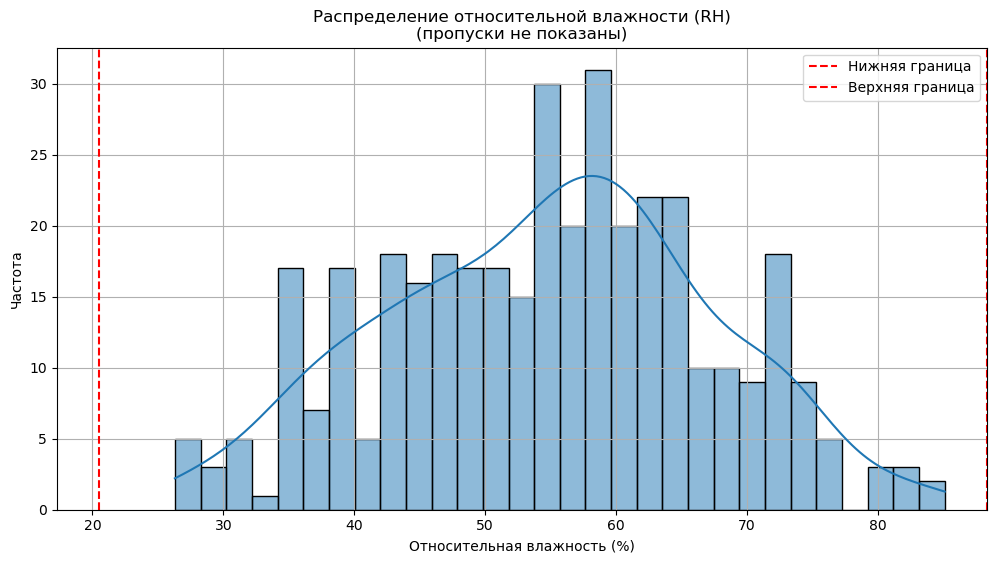


Обнаружено выбросов: 0 (0.0% от непустых значений)
Статистика по выбросам:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: relative_humidity, dtype: float64

Итоговая статистика:
Исходный размер данных: 375 строк
После фильтрации выбросов: 375 строк
Удалено строк с выбросами: 0
Пропусков в исходных данных: 0 (остались без изменений)


In [206]:
column = 'relative_humidity'

# Выделяем непустые значения для анализа
non_null_data = df_clean[column].dropna()


Q1 = non_null_data.quantile(0.25)
Q3 = non_null_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Статистика
print(f"Анализ выбросов для столбца '{column}':\n{'='*50}")
print(f"Кол-во непустых значений: {len(non_null_data)}")
print(f"Q1 (25-й перцентиль): {Q1:.2f}")
print(f"Q3 (75-й перцентиль): {Q3:.2f}")
print(f"IQR (межквартильный размах): {IQR:.2f}")
print(f"Границы нормальных значений: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Визуализация распределения
plt.figure(figsize=(12, 6))
sns.histplot(non_null_data, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound, color='red', linestyle='--', label='Верхняя граница')
plt.title(f'Распределение относительной влажности (RH)\n(пропуски не показаны)')
plt.xlabel('Относительная влажность (%)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

# Анализ выбросов
outliers = non_null_data[(non_null_data < lower_bound) | (non_null_data > upper_bound)]
print(f"\nОбнаружено выбросов: {len(outliers)} ({len(outliers)/len(non_null_data)*100:.1f}% от непустых значений)")
print("Статистика по выбросам:")
print(outliers.describe())

# Фильтр для выборки без выбросов
normal_values_mask = (df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)
df_normal_RH = df_clean[normal_values_mask | df_clean[column].isna()]  # включаем все пропуски

print(f"\nИтоговая статистика:")
print(f"Исходный размер данных: {len(df_clean)} строк")
print(f"После фильтрации выбросов: {len(df_normal_RH)} строк")
print(f"Удалено строк с выбросами: {len(df_clean) - len(df_normal_RH)}")
print(f"Пропусков в исходных данных: {df_clean[column].isna().sum()} (остались без изменений)")

### Колонка height

Анализ выбросов для столбца 'height':
Кол-во непустых значений: 93
Q1 (25-й перцентиль): 160.00
Q3 (75-й перцентиль): 174.00
IQR (межквартильный размах): 14.00
Границы нормальных значений: [139.00, 195.00]


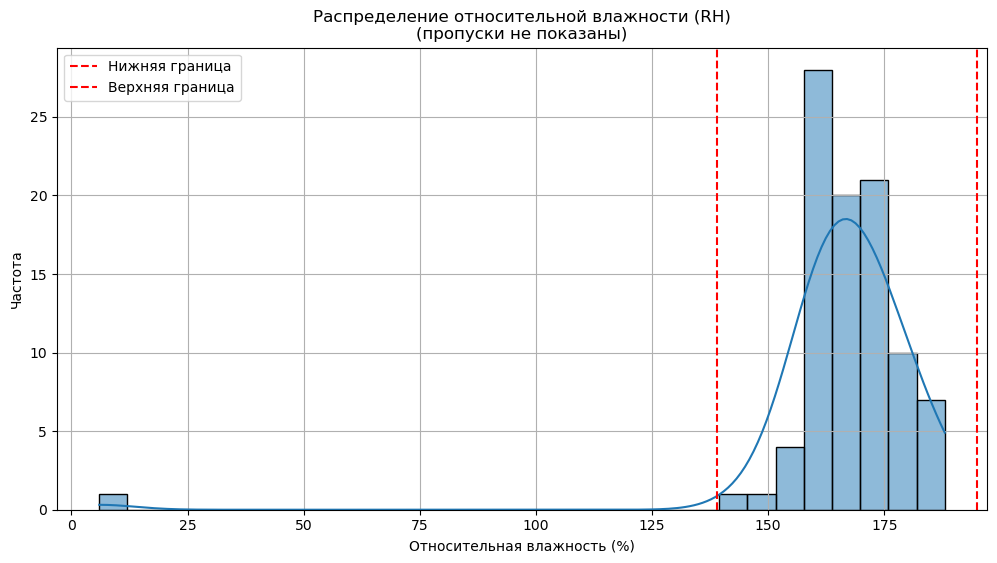


Обнаружено выбросов: 1 (1.1% от непустых значений)
Статистика по выбросам:
count     1.0
mean      6.0
std      <NA>
min       6.0
25%       6.0
50%       6.0
75%       6.0
max       6.0
Name: height, dtype: Float64

Итоговая статистика:
Исходный размер данных: 375 строк
После фильтрации выбросов: 374 строк
Удалено строк с выбросами: 1
Пропусков в исходных данных: 282 (остались без изменений)


In [207]:
column = 'height'

# Выделяем непустые значения 
non_null_data = df_clean[column].dropna()


Q1 = non_null_data.quantile(0.25)
Q3 = non_null_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Вывод статистик
print(f"Анализ выбросов для столбца '{column}':\n{'='*50}")
print(f"Кол-во непустых значений: {len(non_null_data)}")
print(f"Q1 (25-й перцентиль): {Q1:.2f}")
print(f"Q3 (75-й перцентиль): {Q3:.2f}")
print(f"IQR (межквартильный размах): {IQR:.2f}")
print(f"Границы нормальных значений: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Визуализация распределения
plt.figure(figsize=(12, 6))
sns.histplot(non_null_data, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='Нижняя граница')
plt.axvline(upper_bound, color='red', linestyle='--', label='Верхняя граница')
plt.title(f'Распределение относительной влажности (RH)\n(пропуски не показаны)')
plt.xlabel('Относительная влажность (%)')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

# Анализ выбросов
outliers = non_null_data[(non_null_data < lower_bound) | (non_null_data > upper_bound)]
print(f"\nОбнаружено выбросов: {len(outliers)} ({len(outliers)/len(non_null_data)*100:.1f}% от непустых значений)")
print("Статистика по выбросам:")
print(outliers.describe())

# Фильтр для выборки без выбросов
normal_values_mask = (df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)
df_normal = df_clean[normal_values_mask | df_clean[column].isna()]  

print(f"\nИтоговая статистика:")
print(f"Исходный размер данных: {len(df_clean)} строк")
print(f"После фильтрации выбросов: {len(df_normal)} строк")
print(f"Удалено строк с выбросами: {len(df_clean) - len(df_normal)}")
print(f"Пропусков в исходных данных: {df_clean[column].isna().sum()} (остались без изменений)")

### Колонка preferred_temperature_change

In [208]:
df_normal["preferred_temperature_change"].unique()

['Без изменений', 'Теплее', 'Холодн', 'Холоднее', 'Тепле']
Categories (5, object): ['Без изменений', 'Тепле', 'Теплее', 'Холодн', 'Холоднее']

In [209]:
df_normal['preferred_temperature_change'] = df_normal['preferred_temperature_change'].replace(
    {"Тепле": 'Теплее',
      'Холодн': 'Холоднее'}
)


Проверка, что все прошло успешно

In [210]:
df_normal["preferred_temperature_change"].unique()

['Без изменений', 'Теплее', 'Холоднее']
Categories (3, object): ['Без изменений', 'Теплее', 'Холоднее']

### Поиск и удаление точных дубликатов

In [211]:
# Поиск полных дубликатов
duplicates = df_normal[df_normal.duplicated()]
print("Найденные дубликаты:")
print(duplicates)

# Удаление дубликатов
df_normal = df_normal.drop_duplicates()

Найденные дубликаты:
     year season                climate        city country cooling_method  \
482  2012   Зима  Жаркий полузасушливый  Хайдарабад   Индия      Смешанный   
483  2012   Зима  Жаркий полузасушливый  Хайдарабад   Индия      Смешанный   

    mixed_cooling_mode heating_method   age   gender  ...  air_speed  height  \
482  Кондиционирование            NaN  <NA>  Женский  ...       0.02    <NA>   
483  Кондиционирование            NaN  <NA>  Женский  ...       0.02    <NA>   

    weight  curtains fan_mode  window_status  door_status  heating_mode  \
482     76      True     True          False        False          True   
483     76      True     True          False        False          True   

     average_monthly_outdoor_temperature  number_of_complaints  
482                                 21.6                     0  
483                                 21.6                     0  

[2 rows x 30 columns]


Проверка, что все прошло успешно

In [212]:
df_normal["preferred_temperature_change"].unique()

['Без изменений', 'Теплее', 'Холоднее']
Categories (3, object): ['Без изменений', 'Теплее', 'Холоднее']

# Проверить данные на пропуски и заполнить их при необходимости. Обосновать решение.

Проверяем наш DF на попуски

In [213]:
print("\nПропущенные значения:")
print(df_normal.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                      92
heating_method                         167
age                                     49
gender                                  37
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                         243
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                335
relative_humidity                        0
air_speed                                0
height                                 280
weight                         

## Добавляем новые категории

In [214]:
# Добавляем новую категорию
df_normal["mixed_cooling_mode"] = df_normal["mixed_cooling_mode"].cat.add_categories("not applicable")

# Теперь можно заполнить NA
df_normal["mixed_cooling_mode"] = df_normal["mixed_cooling_mode"].fillna("not applicable")

In [215]:

if "No mechanical heating" not in df_normal["heating_method"].cat.categories:
    df_normal["heating_method"] = df_normal["heating_method"].cat.add_categories("No mechanical heating")

df_normal["heating_method"] = df_normal["heating_method"].fillna("No mechanical heating")



In [216]:
# Gender 
if "Unknown" not in df_normal["gender"].cat.categories:
    df_normal["gender"] = df_normal["gender"].cat.add_categories("Unknown")
df_normal["gender"].fillna("Unknown", inplace=True)

Проверка, какие проупски еще остались необработанные

In [217]:
print("\nПропущенные значения:")
print(df_normal.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                     49
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                         243
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                335
relative_humidity                        0
air_speed                                0
height                                 280
weight                         

## Колонка "возраст"

Рассмотрим столбец "возраст", чтобы определеить, чем заполнить пропуски

Построим столбчатую диаграму для рассмотрения данных на предмет неравномерного распределения

count        323.0
mean     40.755418
std      10.957524
min           22.0
25%           35.0
50%           43.0
75%           45.0
max           65.0
Name: age, dtype: Float64
Пропуски: 49


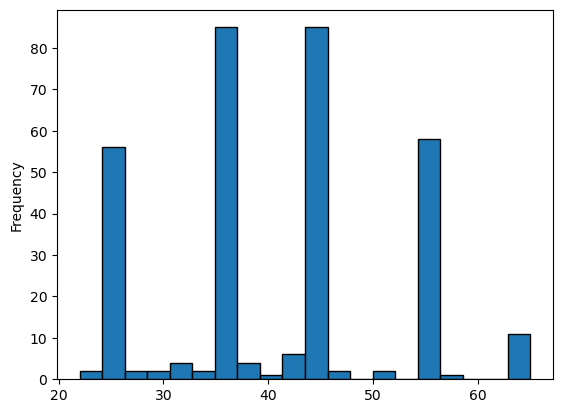

In [218]:
print(df_normal['age'].describe())  # Основные статистики
print("Пропуски:", df_normal['age'].isna().sum())  
df_normal['age'].plot.hist(bins=20, edgecolor='black')  # Гистограмма
plt.show()

Посмотрим на выбросы с помощью графика Boxplot

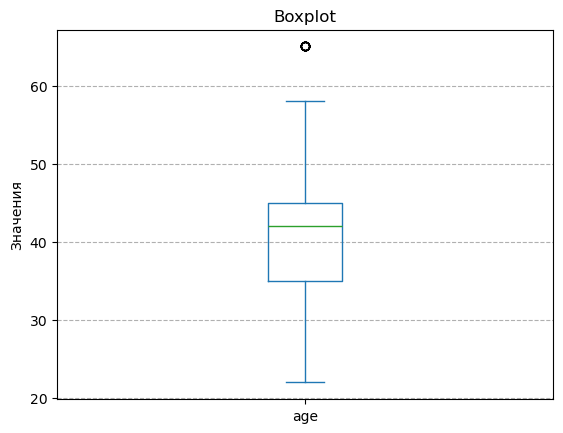

In [219]:
df['age'].plot.box()
plt.title('Boxplot')
plt.ylabel('Значения')
plt.grid(axis='y', linestyle='--')
plt.show()

По графику видно распределение значений в диапазоне 20-60, где большинство данных сосредоточено в интервале 30-45. Для заполнения пропусков (NA/NaN) в таком случае лучше всего подойдет заполнение медианой

Выбросов так таковых нет, поэтому распределение нормальное

Почему: Распределение не выглядит строго нормальным, медиана устойчива к выбросам.

In [220]:
df_normal['age'].fillna(df_normal['age'].median(), inplace=True)

Проверка,что все заполнилось

In [221]:
df_normal["age"].unique()

<IntegerArray>
[42, 27, 32, 43, 26, 31, 38, 22, 36, 34, 28, 29, 39, 35, 46, 40, 50, 25, 51,
 58, 23, 55, 45, 65]
Length: 24, dtype: Int64

Проверка, в каких колонках еще не заполнены пропуски

In [222]:
print("\nПропущенные значения:")
print(df_normal.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                      0
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                         243
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                335
relative_humidity                        0
air_speed                                0
height                                 280
weight                         

Какой дф был

Какой дф стал

Процентное соотношение удаленых строк

In [223]:
print(len(df))
print(len(df_normal))
print((len(df)-len(df_normal)) / len(df))

484
372
0.23140495867768596


In [224]:
print("\nПропущенные значения:")
print(df_clean.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                      93
heating_method                         170
age                                     51
gender                                  37
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool                0
preferred_air_movement_change            0
comfort_rating                         245
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                338
relative_humidity                        0
air_speed                                0
height                                 282
weight                         

доделать заполнения над пропусками и подумать как заполнять

# Провести аналитический и графический анализ данных. Сделать выводы.

In [ ]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]

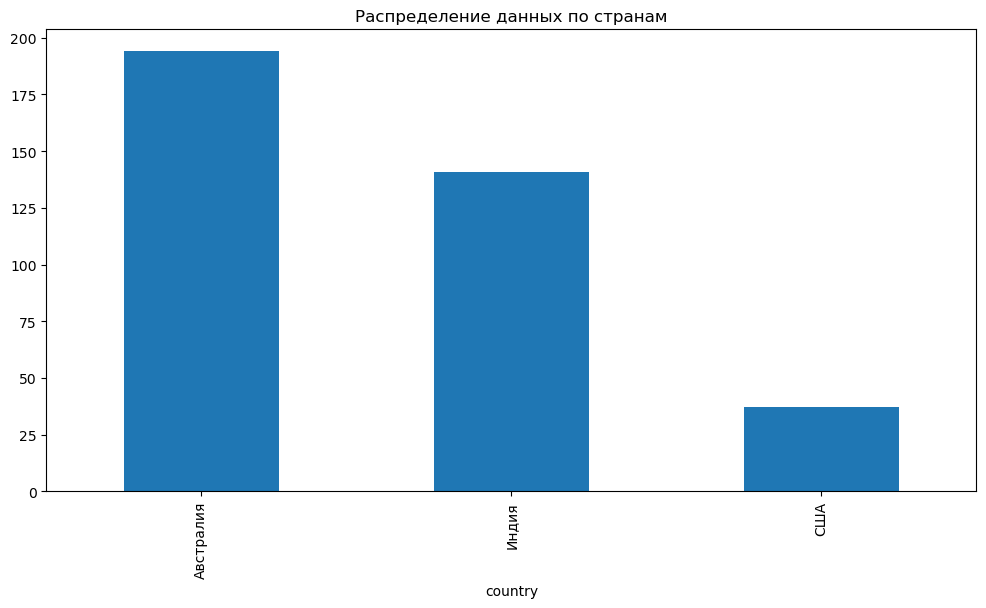

In [227]:
# 1. Распределение по странам и городам
plt.figure(figsize=(12, 6))
df_normal['country'].value_counts().plot(kind='bar', title='Распределение данных по странам')
plt.show()

Географическое распределение: Данные неравномерно распределены по странам - больше всего данных из Австралии, что может влиять на общие выводы.

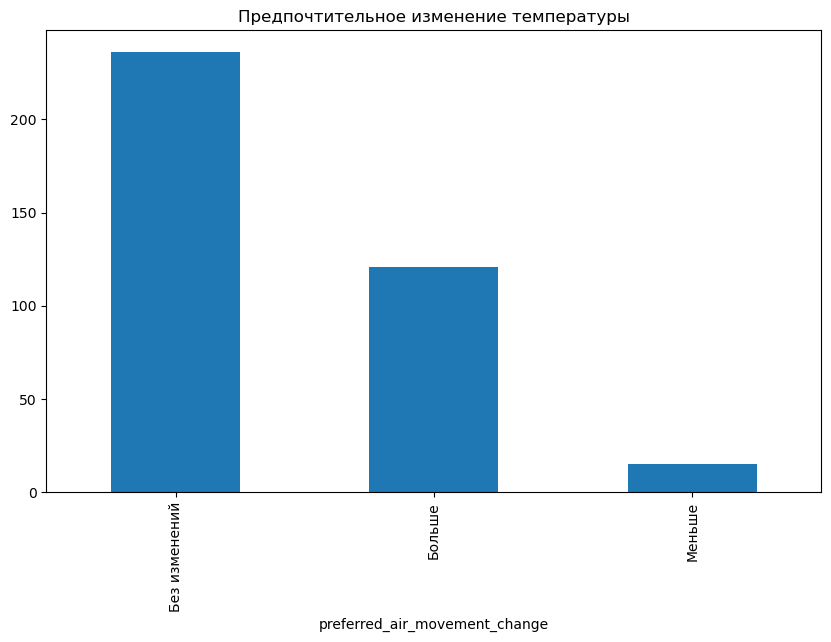

In [228]:
# 2. Распределение температурных предпочтений
plt.figure(figsize=(10, 6))
df_normal['preferred_air_movement_change'].value_counts().plot(kind='bar', title='Предпочтительное изменение температуры')
plt.show()

 Люди чаще всего предпочитают "без изменений"

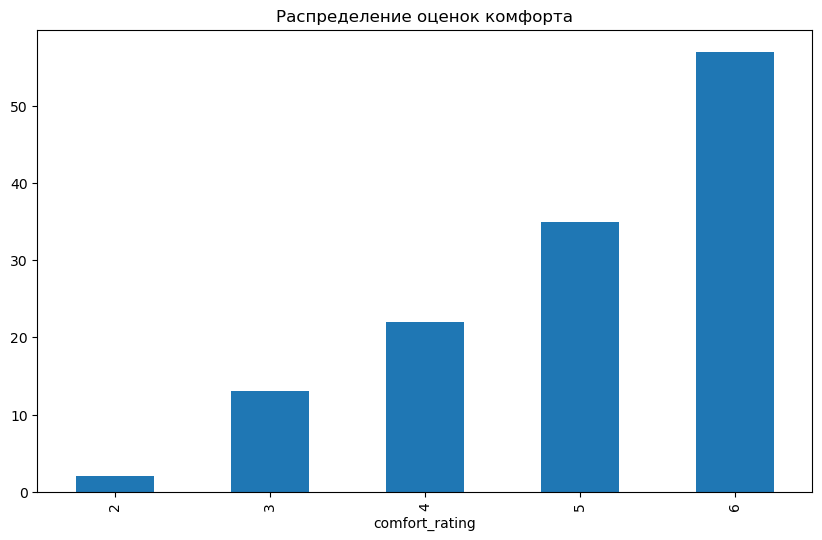

In [229]:
# 3. Распределение оценок комфорта
plt.figure(figsize=(10, 6))
df_normal['comfort_rating'].value_counts().sort_index().plot(kind='bar', title='Распределение оценок комфорта')
plt.show()